In [49]:
# quandl for financial data
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get data from quandl
quandl.ApiConfig.api_key = "N1TaDBJJZWpH8HbK5yLF"
tesla = quandl.get('WIKI/TSLA')
print(tesla.shape)

(1949, 12)


In [3]:
tesla.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


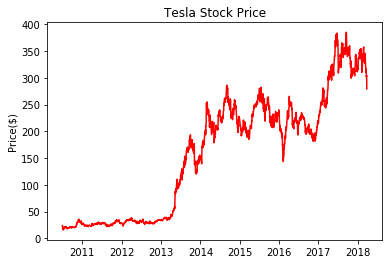

In [4]:
# The adjusted close variable refers to stock splits, so that is what we should graph
plt.plot(tesla.index, tesla['Adj. Close'], 'r')
plt.title('Tesla Stock Price')
plt.ylabel('Price($)');
plt.show()

In [5]:
tesla.reset_index(level=0, inplace = True)
tesla.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


In [6]:
df = pd.DataFrame(tesla)

In [7]:
df.shape

(1949, 13)

In [8]:
df.drop(['High','Low','Close','Volume','Ex-Dividend','Split Ratio','Adj. Open','Adj. High','Adj. Low','Adj. Close',
         'Adj. Volume'],axis=1, inplace=True)
df.head()

,Date,Open
0,2010-06-29,19.00
1,2010-06-30,25.79
2,2010-07-01,25.00
3,2010-07-02,23.00
4,2010-07-06,20.00


In [9]:
df.isnull().sum()

Date    0
Open    0
dtype: int64

In [10]:
df = df.groupby('Date')['Open'].sum().reset_index()

In [11]:
df

,Date,Open
0,2010-06-29,19.00
1,2010-06-30,25.79
2,2010-07-01,25.00
3,2010-07-02,23.00
4,2010-07-06,20.00
...,...,...
1944,2018-03-21,310.25
1945,2018-03-22,313.89
1946,2018-03-23,311.25
1947,2018-03-26,307.34


In [12]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)

In [13]:
y = df['Open'].resample('MS').mean()

In [15]:
y['2011':]

Date
2011-01-01     25.807500
2011-02-01     23.395263
2011-03-01     23.640870
2011-04-01     26.289500
2011-05-01     27.635238
                 ...    
2017-11-01    310.819000
2017-12-01    322.720500
2018-01-01    336.888095
2018-02-01    336.316842
2018-03-01    324.434737
Freq: MS, Name: Open, Length: 87, dtype: float64

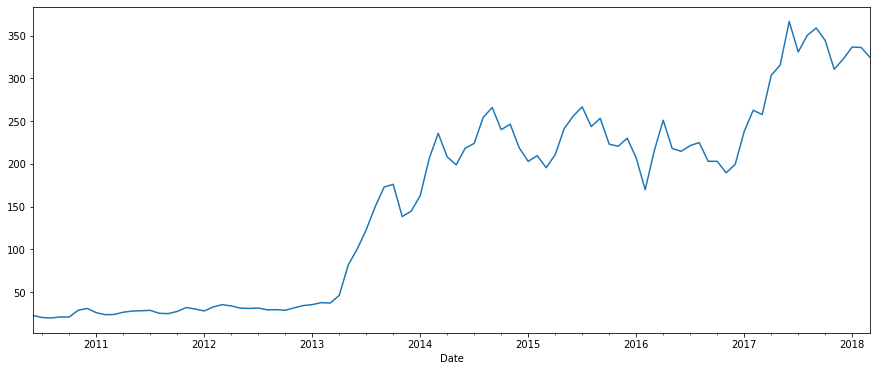

In [18]:
y.plot(figsize=(15, 6))
plt.show()

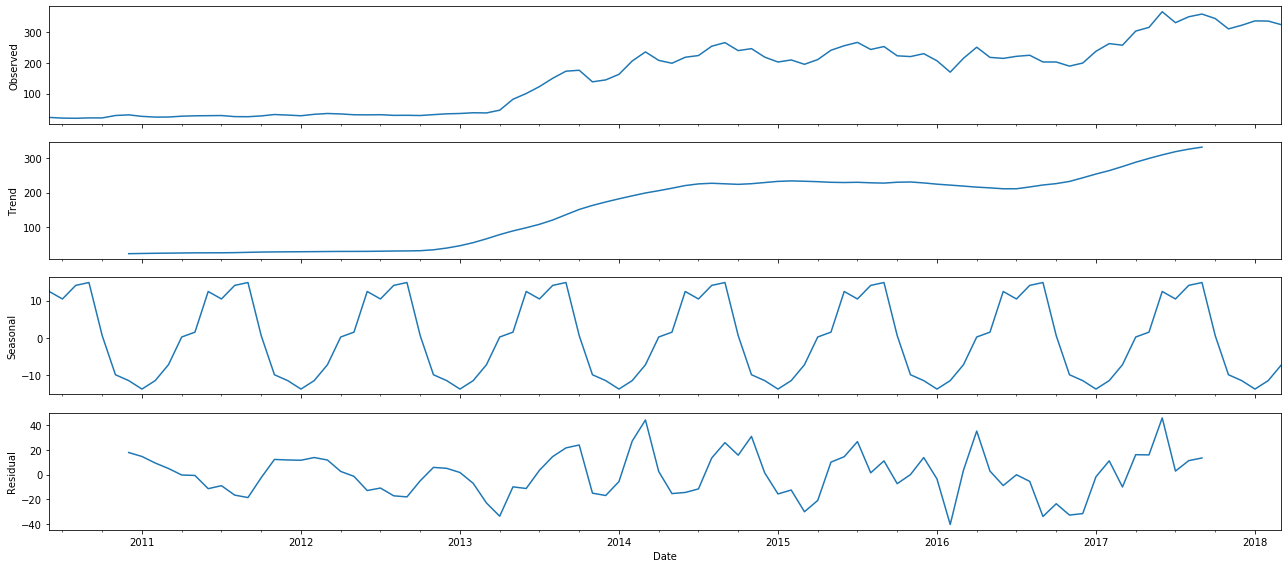

In [20]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [21]:
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [24]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1245.5770108020108
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1040.3690103014817
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:935.1861781336531
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:807.3451721236014
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:931.7337542609876
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:921.7181077845361
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:818.5638126152539
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:809.3163184315232
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1118.1217733414621
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:934.9924198399149
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:846.432453537609
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:731.8017745985031
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:856.918584612844
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:841.1423343775507
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:752.050895169795
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:733.8008945359563
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:805.4236185711713
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:713.3046852898262
ARIMA(0, 1

In [41]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3641      1.266     -0.288      0.774      -2.846       2.118
ma.L1          0.4348      1.246      0.349      0.727      -2.007       2.877
ma.S.L12      -1.0000   3977.289     -0.000      1.000   -7796.343    7794.343
sigma2       425.6792   1.69e+06      0.000      1.000   -3.32e+06    3.32e+06


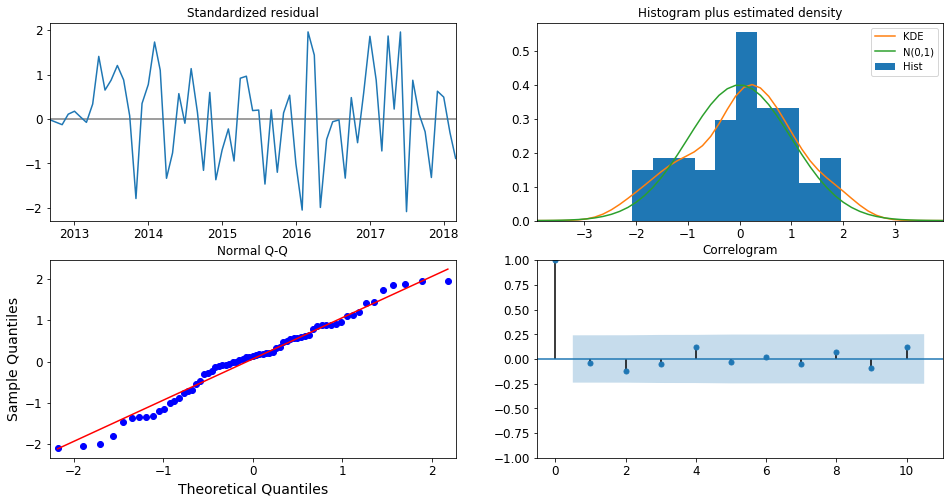

In [42]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

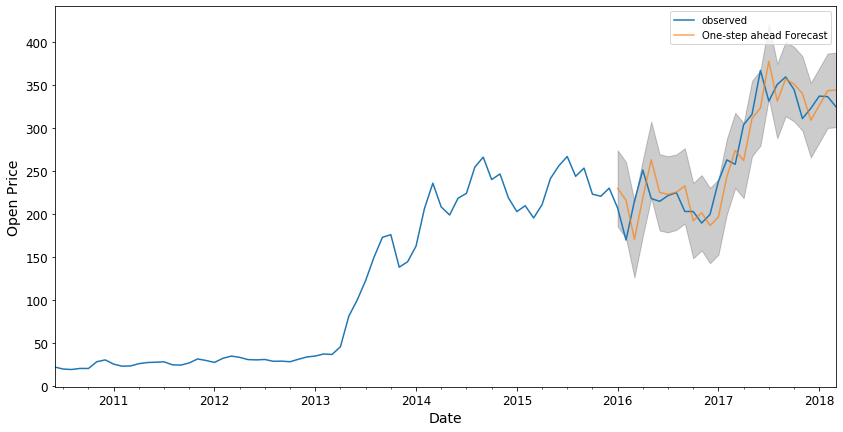

In [46]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Open Price')
plt.legend()
plt.show()

In [50]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 714.58
The Root Mean Squared Error of our forecasts is 26.73


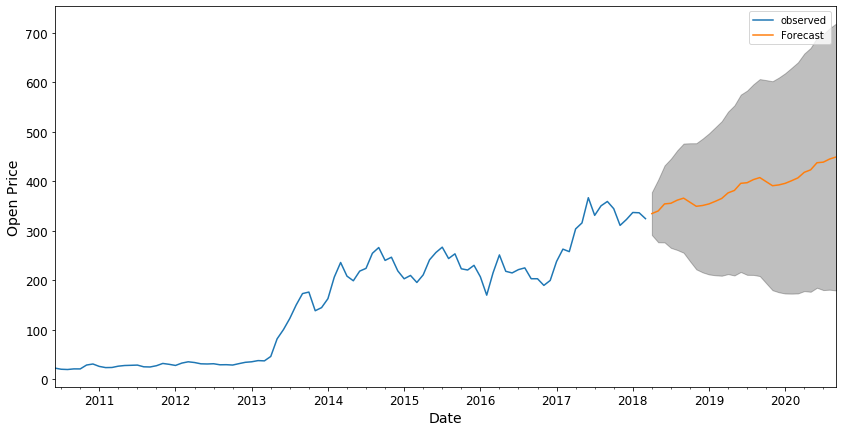

In [51]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Open Price')
plt.legend()
plt.show()